**Проект: Принятие решений в бизнесе**

**Описание проекта:** Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


**Цель проекта:** Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 
    
**Описание данных:**

1. **Данные для первой части:** 

- Файл /datasets/hypothesis.csv.

**Hypothesis**— краткое описание гипотезы;

**Reach** — охват пользователей по 10-балльной шкале;

**Impact** — влияние на пользователей по 10-балльной шкале;

**Confidence** — уверенность в гипотезе по 10-балльной шкале;

**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. **Данные для второй части:**

- Файл /datasets/orders.csv.

**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

**date** — дата, когда был совершён заказ;

**revenue** — выручка заказа;

**group** — группа A/B-теста, в которую попал заказ.

- Файл /datasets/visitors.csv.

**date** — дата;

**group** — группа A/B-теста;

**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста


**План работы:**

**Часть 1. Приоритизация гипотез:**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста:**
**Проанализируйте A/B-тест:**
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделайть выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделайть выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайть выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделайть выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.
  

## Загрузите данные и подготовьте их к анализу

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# уберем ограничение по количеству выводимых символов
pd.options.display.max_colwidth = 150

In [3]:
# функция дло открытия файлов и последующая проверка правильности выполнения
def open_csv(file_path_platform, file_path_loc, columns):
    
    # указываем путь на платформе
    try:
        name = pd.read_csv(file_path_platform, parse_dates=columns, dayfirst=True)
    except:
        
        # указываем путь локально
        try:
            name = pd.read_csv(file_path_loc, parse_dates=columns, dayfirst=True)
        except :
            name = None
            
    # делаем проверку на првильно считывание
    if name is None:
        print('Что-то не так')
    else:
        print('Данные успешно загружены')
        print('*' * 40)
        print('Вывожу первые 10 сторк датафрейма:')
        display(name.head(10))
        print('*' * 40)
        print('Выведем названия столбцов до обработки:', name.columns)
        name.columns = name.columns.str.lower().str.replace(' ', '_')
        print('Выведем названия столбцов после обработки:', name.columns)
        print('*' * 40)
        print('Статистическая информация о данных (describe()):')
        print(name.describe())
        print('*' * 40)
        print('Вывожу основную информацию о датафрейме:')
        name.info()
        return name

In [4]:
hypothesis = open_csv('/datasets/hypothesis.csv', '/Users/sergey/Downloads/hypothesis.csv', [])

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


****************************************
Выведем названия столбцов до обработки: Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')
Выведем названия столбцов после обработки: Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
****************************************
Статистическая информация о данных (describe()):
           reach     impact  confidence    efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.000000    9.000000  10.000000
****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns 

**В таблице с гипотезами, можно обнаружить стилистические ошибки в названии столбцов, которые были исправленны при помощи функции, типы данных соответствуют, пропуски отсутствуют, явные дубликаты тоже.**

In [5]:
orders = open_csv('/datasets/orders.csv', '/Users/sergey/Downloads/orders.csv', ['date'])

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


****************************************
Выведем названия столбцов до обработки: Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
Выведем названия столбцов после обработки: Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')
****************************************
Статистическая информация о данных (describe()):
       transactionid     visitorid       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09  2.165960e+09  8.348006e+03
std     1.229085e+09  1.236014e+09  3.919113e+04
min     1.062393e+06  5.114589e+06  5.000000e+01
25%     1.166776e+09  1.111826e+09  1.220000e+03
50%     2.145194e+09  2.217985e+09  2.978000e+03
75%     3.237740e+09  3.177606e+09  8.290000e+03
max     4.293856e+09  4.283872e+09  1.294500e+06
****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 col

**В таблице с заказами, в  названии столбцов ошибок не обнаружено. Типы данных соответствуют, пропуски и явные дубликаты отсутсвуют.**

In [6]:
visitors = open_csv('/datasets/visitors.csv', '/Users/sergey/Downloads/visitors.csv', ['date'])

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


****************************************
Выведем названия столбцов до обработки: Index(['date', 'group', 'visitors'], dtype='object')
Выведем названия столбцов после обработки: Index(['date', 'group', 'visitors'], dtype='object')
****************************************
Статистическая информация о данных (describe()):
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**В таблице с посетителями, так же не ображужено ошибок в названии столбцов, типы данных привидены верно, пропуски и явные дубликаты отсутствуют.**

## Часть 1. Приоритизация гипотез

### Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Для приоритицации гиоптез методом ICE: перемножим показатели того, насколько сильно изменение повлияет на пользователей, уверенность, что это изменение повлияет на пользователей именно так и разделим на оценку стоимости тестирования гипотезы

In [7]:
# производим расчет ICE
hypothesis['ICE'] =  round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

# отсортируем по убыванию показателя ICE
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


#### Вывод: 
Таким образом, при использовании одного из самых популярных способов приритизации задач (ICE), лидирующими гипотезами получаются гипотезы "Запустить акцию, дающую скидку на товар в день рождения"(8), "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"(0), "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"(7).

### Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Для приоритицации гиоптез методом RICE: перемножим оценку колицества пользователей которых затронет изменение, насколько сильно изменение повлияет на пользователей, уверенность, что это изменение повлияет на пользователей именно так и разделим на оценку стоимости тестирования гипотезы

In [8]:
# производим расчет RICE:
hypothesis['RICE'] = (
    (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])
    / hypothesis['efforts']
)

# отсорируем гипотезы по показателю RICE
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


#### Вывод: 
Приоритизация гипотез, методом RICE, показала, что лидерами будут гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"(7), "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"(2), "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"(0)

### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Исходя из полученных данных, можно сделать вывод,разные методы дают разные результаты. Но самые перспективные гипотезы остались в лидирующих позициях. Так например у метода ICE лидером была гипотеза - "Запустить акцию, дающую скидку на товар в день рождения"(8), а при использовании метода RICE - оказалась на 5 месте. Так произошко потому что метод ICE не учитывает охват количества пользователей, но зато показывает высокую оценку уверенноси влияния изменения на пользователей на которыхповлияет изменение и среднюю стоимость тесттирования гипотезы. При использовании метода RICE - лидером стала гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"(7), ее показатель влияния на количество пользователей составляет 10 из 10, что говорит нам о широком охвате пользователей, показатели уверенности так же находятся на достаточно высоком уровне, а стоимость тестирования гипотезы оценивается как средняя. Показатель "Reach" - является главным отличием между двумя способами, метод RICE учитывает его, а ICE - нет.

## Часть 2. Анализ A/B-теста: Проанализируйте A/B-тест:

### Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

Для проведения А/В теста, нам понадобятся два датафрейма: "orders" и "visitors". выведем их для наглядности

In [9]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

In [12]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <=  x['date'], 
                                                                    orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionid' : 'nunique', 
          'visitorid' : 'nunique', 
          'revenue' : 'sum'}),
                      axis=1)
    .sort_values(by=['date','group'])
)

In [13]:
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                     visitors['group'] == x['group'])]
    .agg({'date' : 'max',
          'group' : 'max',
          'visitors' : 'sum'}),
                      axis=1)
    .sort_values(by=['date', 'group'])
)

In [15]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [16]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [17]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

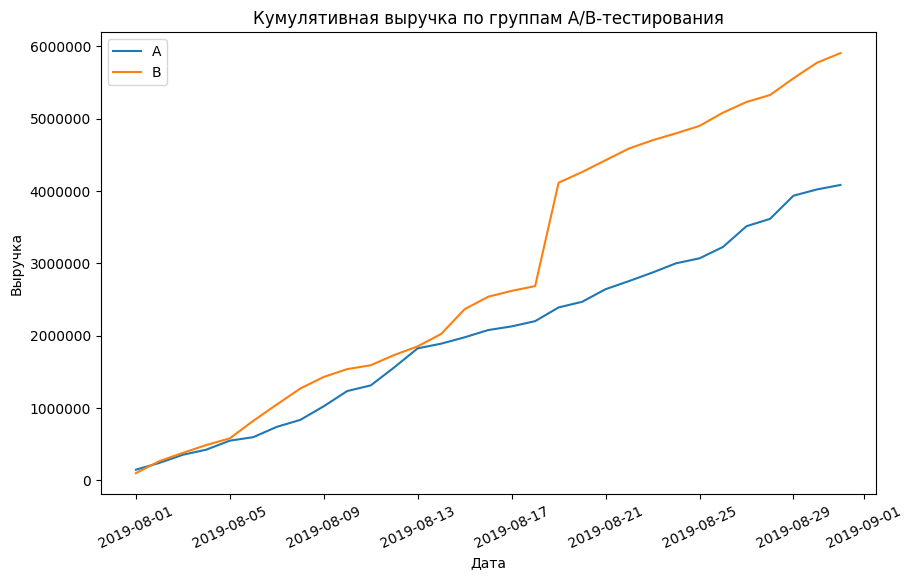

In [19]:
# построим график кумулятивной выручки по группам
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам A/B-тестирования')
plt.xticks(rotation = 25)
plt.legend()
plt.show()

#### Вывод: 
Выручка у группы А и В равномерно увеличивается в течение всего теста, однако на графике видны резкик скачки, особенно сильный у категории В. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построить график кумулятивного среднего чека по группам. Сделайть выводы и предположения.

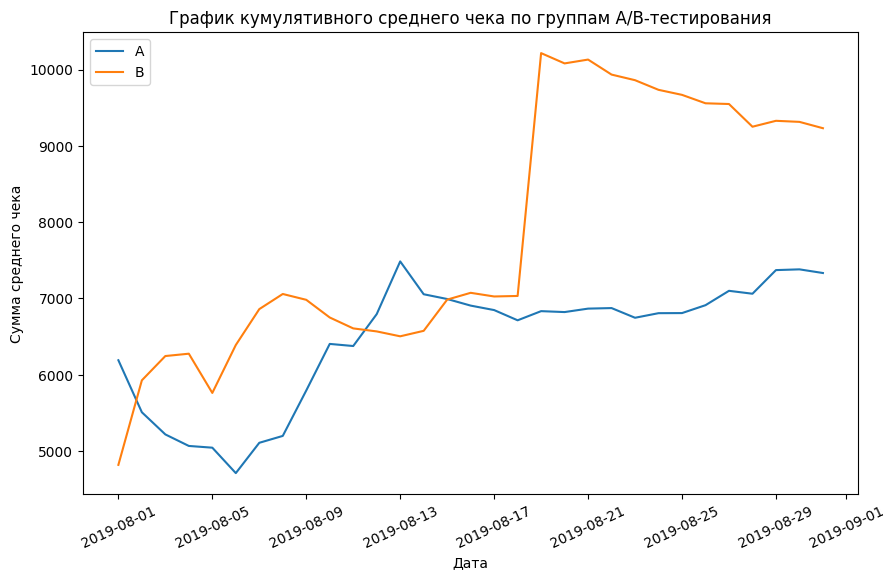

In [20]:
# построим график кумулятивного среднего чека по группам
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.title('График кумулятивного среднего чека по группам A/B-тестирования')
plt.legend(loc=2)
plt.xticks(rotation = 25)
plt.show()

#### Вывод: 
Средний чек для обоих групп сначала рос, затем у групы А начал падать и ближе к концу опять отрастать. Для группы В виден резкий скачек роста среднего чека, видимо там был какой то крупный (аномальный) заказ, после показатель снова стал падать. Нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


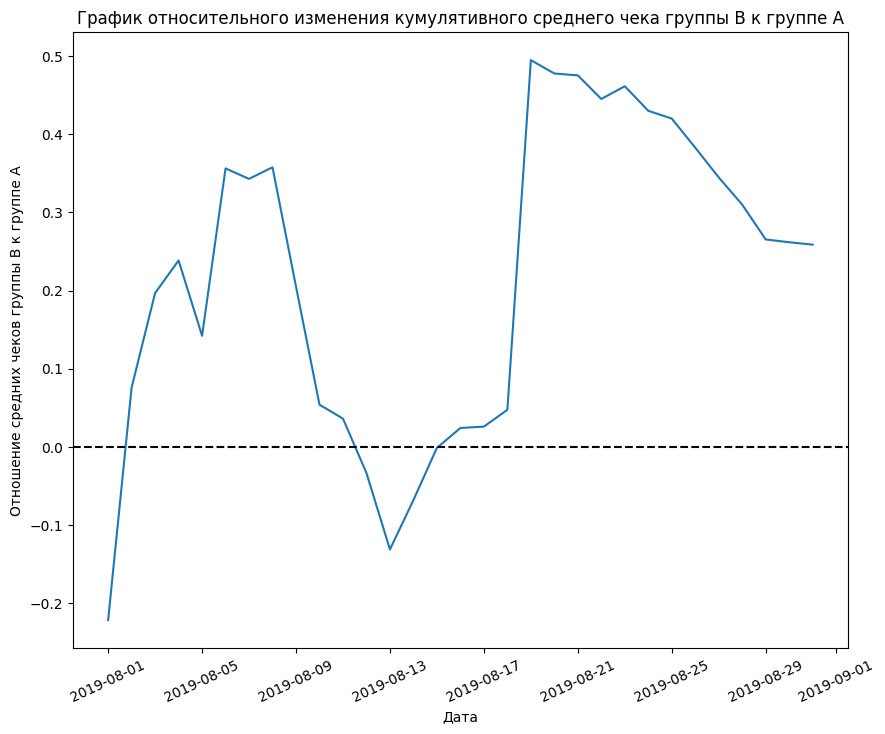

In [22]:
# cтроим отношение средних чеков
plt.figure(figsize=(10, 8))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1
)
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков группы В к группе А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 25)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#### Вывод: 
В нескольких точках график различия между сегментами резко «скачет».  В начале эксперимента группа B показывала более низкие значения среднего чека по сравнению с группой A. Затем произошел рост среднего чека в группе B, что привело к ее лидерству перед группой A. После этого снова наблюдалась переменная динамика, когда группа A вернулась в лидеры. Далее были зафиксированы резкие колебания, характеризующиеся ростом среднего чека и падением к концу.

Таким образом, результаты указывают на нестабильность различий между сегментами в течение времени и требуют дополнительного анализа для понимания причин такой динамики.

### Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделайть выводы и предположения.

In [23]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [24]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'conversion']]
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'conversion']]

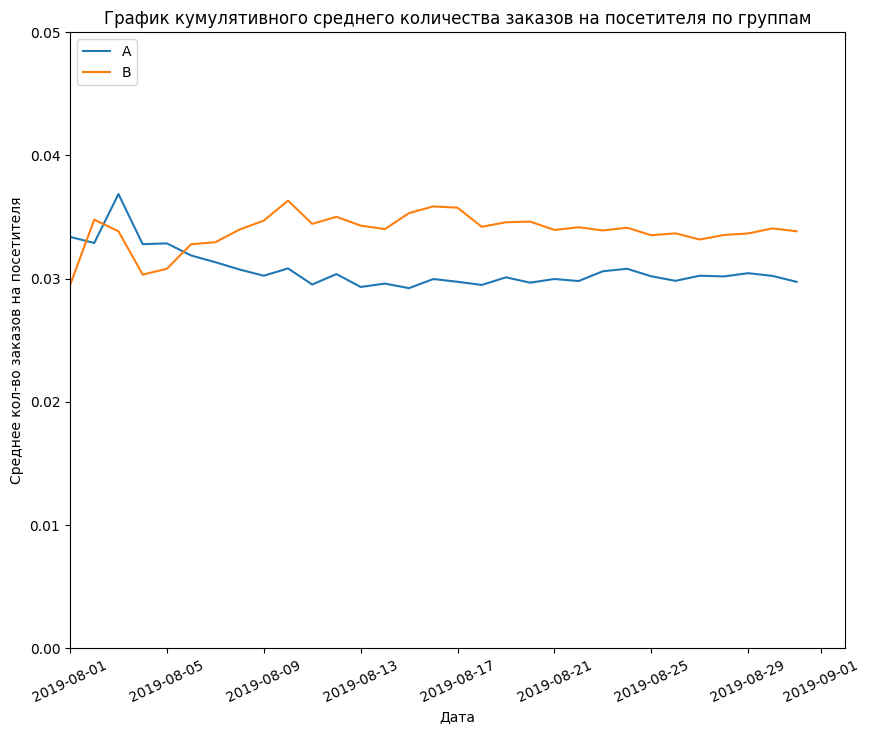

In [25]:
# построим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(10, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(loc=2)
plt.xticks(rotation=25)
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 2), 0, 0.05])
plt.show()

#### Вывод:  
У группы A среднее количество заказов вырвалось вперёд и затем начало падать, после чего зафиксировалось на одном уровне и стало ниже чем у греппы В. Средние показатели группы В сначала были меньше чем у группы А, затем вырости, обогнали показатели группы А и оставались на одном уровне.

### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайть выводы и предположения.

In [26]:
mergedCumulativeConversions = cumulativeDataA.merge(cumulativeDataB, on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


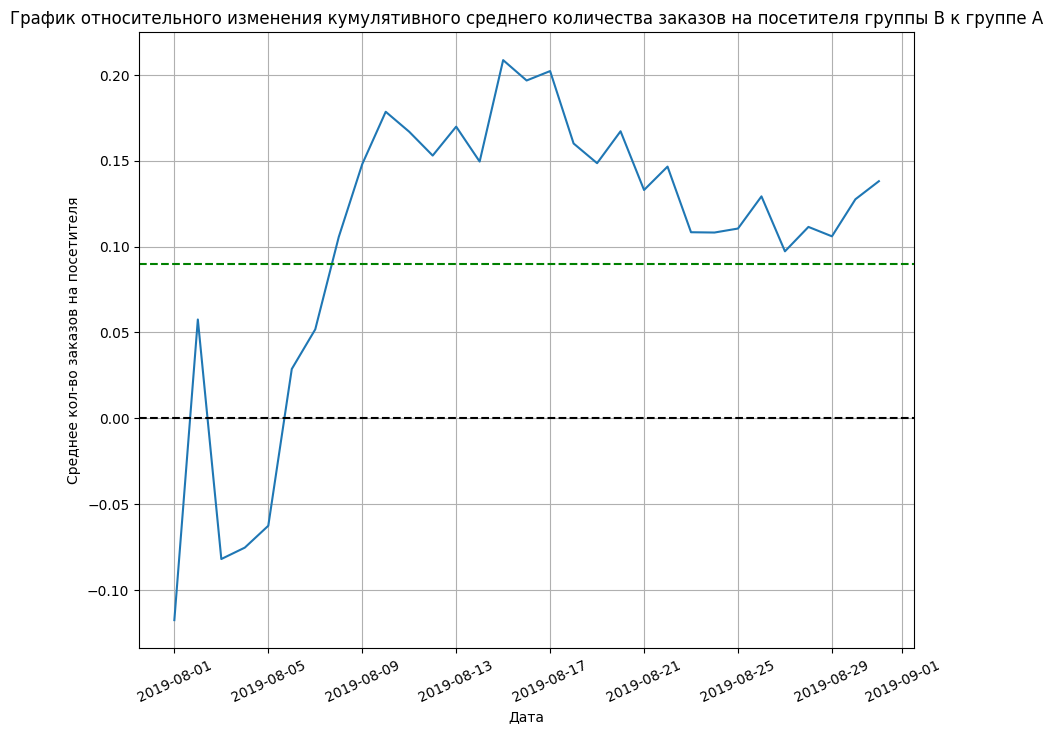

In [27]:
# построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.figure(figsize=(10, 8))
plt.plot(
    mergedCumulativeConversions['date'], 
    (mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA']) - 1
);
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.xticks(rotation=25)
plt.grid(True) 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.09, color='green', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A');

#### Вывод:  
В начале теста среднее количество заказов на посетителя было выше у пользователей категории А, однако группа В затем обогнала группу А. Потом среднее количество заказов у группы В уменьшалось, но уже через неделю тестов, у группы В посетителей было больше на протяжении всего теста. Конверсия в группе В не падала ниже 9% спустя неделю тестов, что может свидетельствовать о стабильности этого показателя.

Таким образом, можно предположить, что группа В продемонстрировала устойчивый рост числа посетителей и стабильную конверсию на протяжении теста, что может указывать на потенциальное улучшение результатов в этой группе.



### Построить точечный график количества заказов по пользователям. Сделайть выводы и предположения.

Для построения графика заказов по пользователям обратимся к таблице "orders" и сгрупируем данные по пользователям и сосчитаем количество покупок для каждого.

In [28]:
# Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid' : 'nunique'})
    
)
ordersByUsers.columns = ['userId', 'orders']

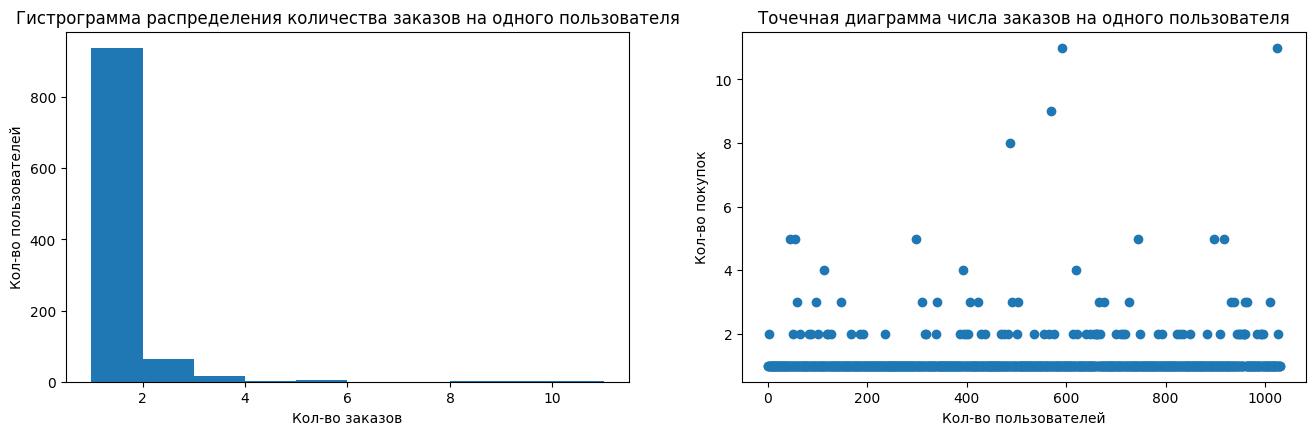

In [29]:
# создаеv массив с целочисленными значениями от 0 до длины массива данных 
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.figure(figsize=(16,10))

# построим гистограму распределений количества заказов на одного пользователя
plt.subplot(2, 2, 1)
plt.hist(ordersByUsers['orders'])
plt.xlabel('Кол-во заказов')
plt.ylabel('Кол-во пользователей')
plt.title('Гистрограмма распределения количества заказов на одного пользователя')

# построим точечную диаграмму числа заказов на одного пользователя
plt.subplot(2, 2, 2)
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во покупок')
plt.title('Точечная диаграмма числа заказов на одного пользователя')

plt.show()

#### Вывод:
На графиках видно, что большая часть пользователей совершили 1 покупку. Покупатели которые свершили 2 покупки так же имеются в достаточном количестве. Остальные совершали от 3 до 11 покупок. Их точная доля не ясна.

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [30]:
# c помощью библиотеки numpy рассчитаем перцентили
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

#### Вывод: 
По полученным данным, не более 5% пользователей оформляли больше чем 2  заказа, а 1% пользователей оформляли  4 и более заказов. Таким образом, можно рассматривать как аномальных тех пользователей, которые оформили 3 заказа и более.


### Построить точечный график стоимостей заказов. Сделать выводы и предположения.

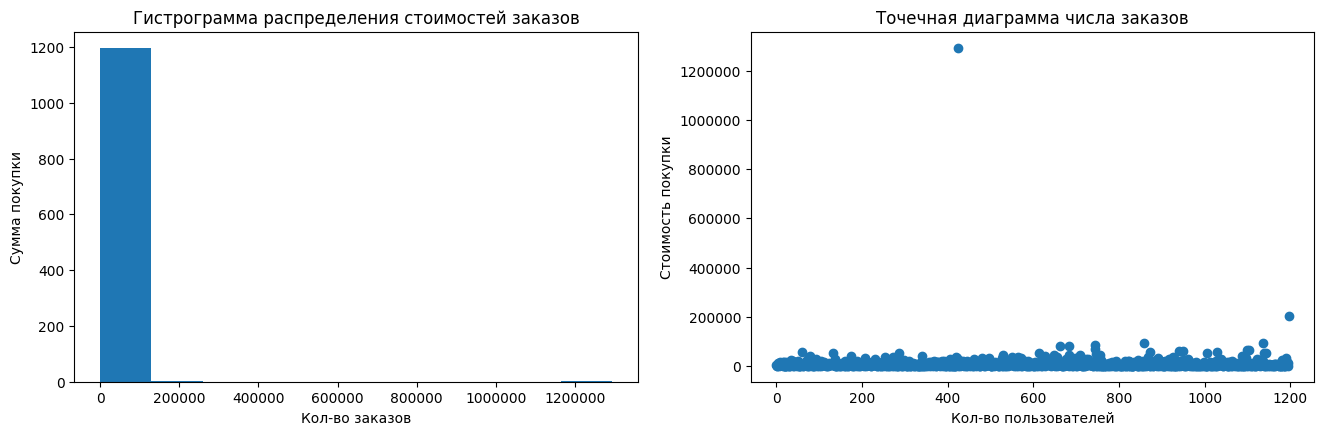

In [31]:
plt.figure(figsize=(16,10))

# построим гистограму распределений стоимостей заказов
plt.subplot(2, 2, 1)
plt.ticklabel_format(style='plain')
plt.hist(orders['revenue'])
plt.xlabel('Кол-во заказов')
plt.ylabel('Сумма покупки')
plt.title('Гистрограмма распределения стоимостей заказов')

x_values = pd.Series(range(0, len(orders['revenue'])))
# построим точечный график стоимостей заказов
plt.subplot(2, 2, 2)
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость покупки')
plt.title('Точечная диаграмма числа заказов')

plt.show()

#### Вывод: 
Исходя из анализа графиков, можно сделать вывод, что большинство заказов имеют стоимость до 100 000. Однако на точечной диаграмме выделяются два аномальных значения, которые, вероятно, искажали общую картину на предыдущих графиках. Таким образом, эти два аномальных значения могут потенциально влиять на статистические выводы.

### Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [32]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### Вывод: 
По полученным данным, не более 5% пользователей совершали покупки на сумму более 28000, а 1% пользователей на сумму более 58233. Будем считать 5% пользователей аномальными, тех у кого покупки дороже чем 58233.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. 

**Нулевая гипотеза**: различий в среднем количестве заказов между группами нет. 

**Альтернативная гипотеза**: различия в среднем между группами есть.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [34]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [35]:
# создадим переменные, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid' : 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid' : 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders']

In [45]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                               len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                  len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего количества заказов группы В к группе А = {0:.3f}'
      .format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост среднего количества заказов группы В к группе А = 0.138


#### Вывод:
Исходя из полученного значения p-value, которое составляет 1.7% и является меньшим, чем принятый уровень статистической значимости в 5%, мы должны отвергнуть нулевую гипотезу о равенстве количества заказов двух групп. Это указывает на то, что существует статистически значимое различие между группой A и группой B.

Кроме того, относительный прирост среднего значения в группе B по сравнению с группой A составляет 13.8%. Это позволяет сделать вывод о том, что группа B имеет значительное увеличение по сравнению с группой A, и это различие является статистически значимым.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [37]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост значения среднего чека группы В к группе А {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный прирост значения среднего чека группы В к группе А 0.259


#### Вывод:
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A на 26%.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Будем считать пользователей аномальными, тех у кого покупки дороже чем 58233 и те которые оформили 3 заказа и более.


In [38]:
# узнаем, сколько всего аномальных пользователей 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64
20


Всего 20 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.

Альтернативная гипотеза: различия в среднем между группами есть.

In [40]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.151


#### Вывод:
По результатам теста без участия аномальных показателей, результат теста оказался практически неизменным. P-value стало равным 1.4%, а было 1.7%. Результат остался прежним, отвергаем нулевую гипотезу о равенстве среднего количества заказов между группами. Относительный прирост среднего значения в группе B по сравнению с группой A вырос и составляет 15.1%, вместо 13.8%

Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [41]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.959
-0.014


#### Вывод:
После очистки данных от аномальных значений, значение p-value выросло и стало 9.6%, что говоорит о том, что статически значимых отличий в среднем чеке между группами - нет. P-value увеличился, но и разница между сегментами сократилась с 26% до 1.4%.

### Принять решение по результатам теста и объяснить его. 

Вывод:
- Достигнута статистическая значимость различий, в среднем количестве заказов на посетителя между группами, как по сырым данным, так и после фильтрации аномалий. Сегмент B значительно лучше сегмента A.
- По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
- График относительного изменения кумулятивного среднего чека группы B к группе A показал преимущество перед группой А, хотя имелись и колебания, а в конце было замечено плавное падение, вероятнее всего вызванное аномальным значением.
- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показал, устойчивый рост числа посетителей и стабильную конверсию на протяжении теста, что может указывать на потенциальное улучшение результатов в этой группе

Исходя из полученных результатов, рекомендуется завершить тестирование и принять гипотезу о том, что группа B превосходит группу A по количеству заказов на посетителя. Хотя статистически значимого различия в среднем чеке между группами не обнаружено, визуальный анализ графиков также не выявил существенного изменения. Это свидетельствует о потенциальном росте количества заказов в группе B, что в конечном итоге может привести к увеличению общей прибыли. 

Первый вариант ответа: Остановить тест, зафиксировать победу одной из групп